In [1]:
from thinkdsp import CosSignal, SinSignal

cos_sig = CosSignal(freq=4682.74, amp=0.02, offset=0)
sin_sig = SinSignal(freq=4682.74, amp=0.02, offset=0)

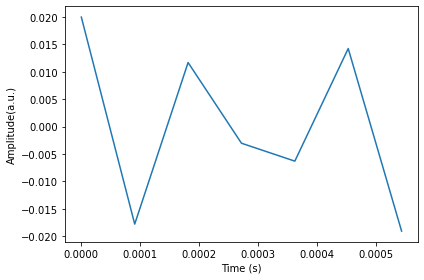

In [2]:
from thinkdsp import decorate

cos_sig.plot()
decorate(xlabel='Time (s)')
decorate(ylabel='Amplitude(a.u.)')

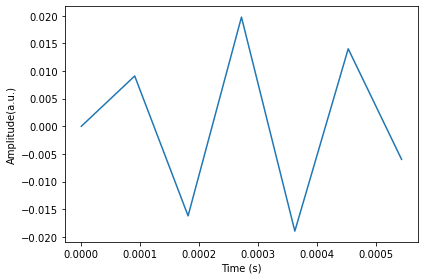

In [3]:
sin_sig.plot()
decorate(xlabel='Time (s)')
decorate(ylabel='Amplitude(a.u.)')

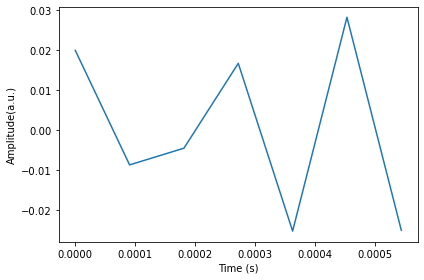

In [4]:
mix = sin_sig + cos_sig
mix

mix.plot()
decorate(xlabel='Time (s)')
decorate(ylabel='Amplitude(a.u.)')

In [5]:
wave = mix.make_wave(duration=0.5, start=0, framerate=11025)
wave

In [6]:
from IPython.display import Audio
audio = Audio(data=wave.ys, rate=wave.framerate)
audio

In [7]:
from thinkdsp import read_wave

wave = read_wave('001_bunyi_gitar_listrik.wav')
wave.make_audio()

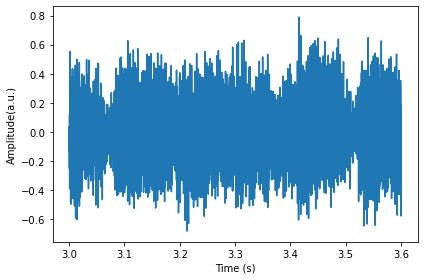

In [8]:
start = 3.0
duration = 0.6
segment = wave.segment(start, duration)
segment.plot()
decorate(xlabel='Time (s)')
decorate(ylabel='Amplitude(a.u.)')

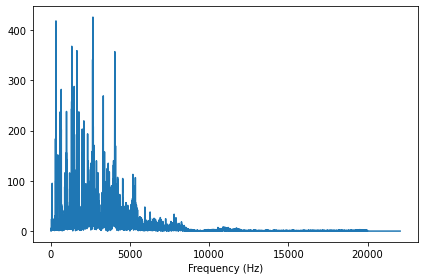

In [9]:
spectrum = segment.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

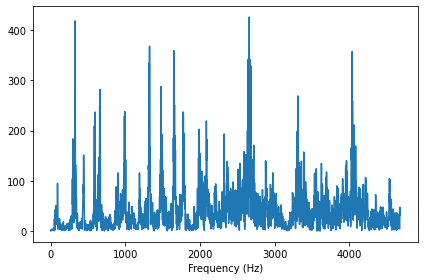

In [10]:
spectrum.plot(high=4682.74)
decorate(xlabel='Frequency (Hz)')

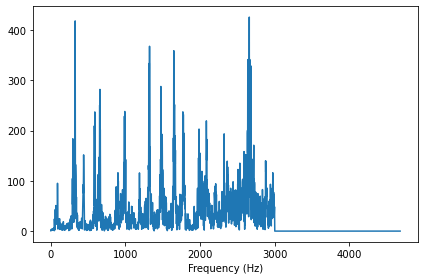

In [11]:
spectrum.low_pass(3000)
spectrum.plot(high=4682.74)
decorate(xlabel='Frequency (Hz)')

In [12]:
filtered = spectrum.make_wave()

In [13]:
filtered.normalize()

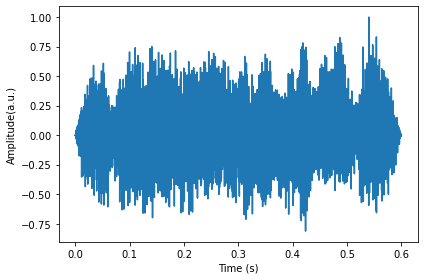

In [14]:
filtered.apodize()
filtered.plot()
decorate(xlabel='Time (s)')
decorate(ylabel='Amplitude(a.u.)')

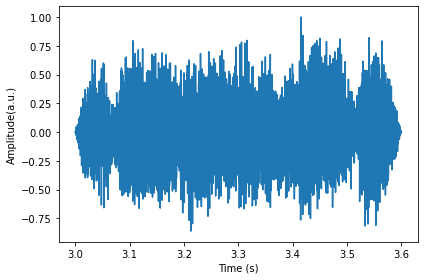

In [15]:
segment.normalize()
segment.apodize()
segment.plot()
decorate(xlabel='Time (s)')
decorate(ylabel='Amplitude(a.u.)')

In [16]:
segment.make_audio()

In [17]:
filtered.make_audio()

In [19]:
import matplotlib.pyplot as plt
from IPython.display import display

def filter_wave(wave, start, duration, cutoff):
    """Selects a segment from the wave and filters it.
    
    Plots the spectrum and displays an Audio widget.
    
    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(color='#045a8d')
    decorate(xlabel='Frequency (Hz)')
    plt.show()
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

In [20]:
from ipywidgets import interact, fixed

wave = read_wave('001_bunyi_gitar_listrik.wav')
interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 4682, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…